# Project Foundations for Data Science: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Set the warning filter to ignore
warnings.filterwarnings('ignore')

### Data Structure

In [ ]:
#mount drive for data import
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSFoundations/Project/foodhub_order.csv')
# returns the first 5 rows
df.head()
df_original=df.copy() #making a copy of original data set

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [ ]:
#Identifying the shape of the data.
rows, columns = df.shape
print(f'The number of Rows is {rows}. The number of Columns is {columns}.')

The number of Rows is 1898. The number of Columns is 9.


#### Observations:
The 1898 rows is the number of orders observed in this data set. Each row will corresponds to an order id located in the 'order_id' column.

### Data Types

In [ ]:
#Listing the data types with their corresponding columns.
print(df.dtypes)
print()
#changing id variables from int to object
df.order_id = df.order_id.astype(str)
df.customer_id = df.customer_id.astype(str)
print(f'Data types after changing id columns to a string:\n{df.dtypes}')


order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

Data types after changing id columns to a string:
order_id                  object
customer_id               object
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


#### Observations:
As stated before, there are 9 columns in the dataframe. Two of these columns were id variables listed as integers. I have changed the type to object to assist with visualizations.
The 'rating' variable is listed as an object.

### Missing Values


In [ ]:
#Printing number of missing by variable.
print(f'Number Missing by variable:\n{df.isnull().sum()}\n')

#printing all unique values by column to explore for unexpected values.
object_columns = df.columns[df.dtypes=='object']
for col_name in object_columns:
  unique_values = df[col_name].unique()
  print(f"Unique values for column '{col_name}':")
  print(unique_values)
  print()

#printing a count of each unique value by column.
for col in object_columns:
  ccount = df[col].value_counts()
  print(ccount)
  print()
#printing a percent of each unique value by column.
for col in object_columns:
  ccount = df[col].value_counts(normalize=True,dropna=False)
  print(ccount)
  print()

#changing 'not given' in rating to missing and changing rating type to numerical
df.replace('Not given',np.nan, inplace = True)
df['rating'] = df['rating'].astype(float)

# Reprinting number of missing by variable after edits.
print(f'Number Missing by variable:\n{df.isnull().sum()}\n')

Number Missing by variable:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Unique values for column 'order_id':
['1477147' '1477685' '1477070' ... '1477819' '1477513' '1478056']

Unique values for column 'customer_id':
['337525' '358141' '66393' ... '97838' '292602' '397537']

Unique values for column 'restaurant_name':
['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of G

#### Observations:
An initial search of the data showed that there where no missing values within the data frame. An exploration of the counts of unique values in each column and the fact that 'rating' was showing as an object when expecting a numerical variable, showed that missing values for 'rating' were listed as 'Not given'.
Converting 'rating' to a float variable allowed to replace the missins with Nan so calculations can be completed on the variable. There are 736 missing ('Not given) ratings (about 39%).

### Data Summary

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #setting default decimal to 2 places.
print(f'There are {df.duplicated().sum()} total duplicate rows.' ) #checking for duplicates.
df.describe().T #5 number summary of numerical variables


There are 0 total duplicate rows.


,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1162.00,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
There is low variable in rating with no values under 3 stars. This seems like an unlikely anomaly.
Cost of order appears to have high variable compared to its' mean. Ranging from 4.47 to 35.41.
Food preparation time averages 27.37 minutes, rangeing between 20 and 35 minutes.
Delivery time is similar with a mean 24.16 minutes, ranging from 15 to 33 minutes.  

### Exploratory Data Analysis (EDA)

### Univariate Analysis

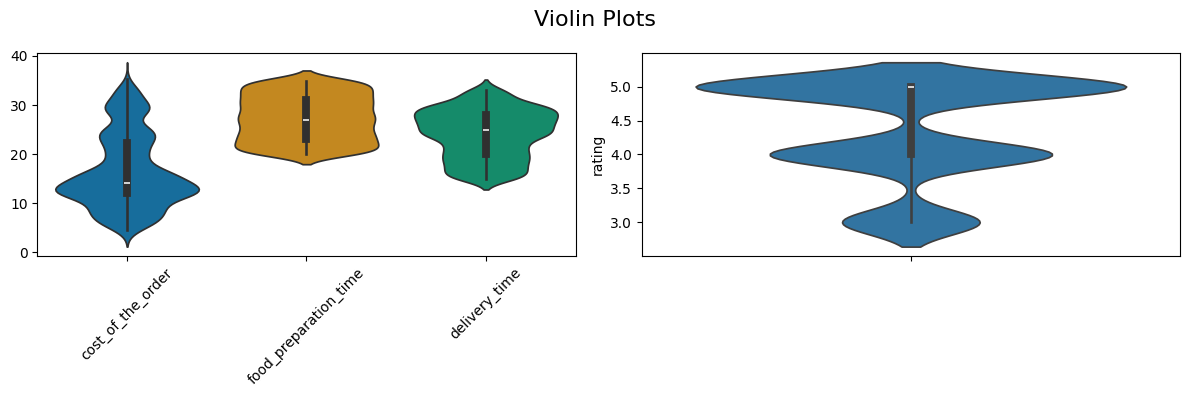

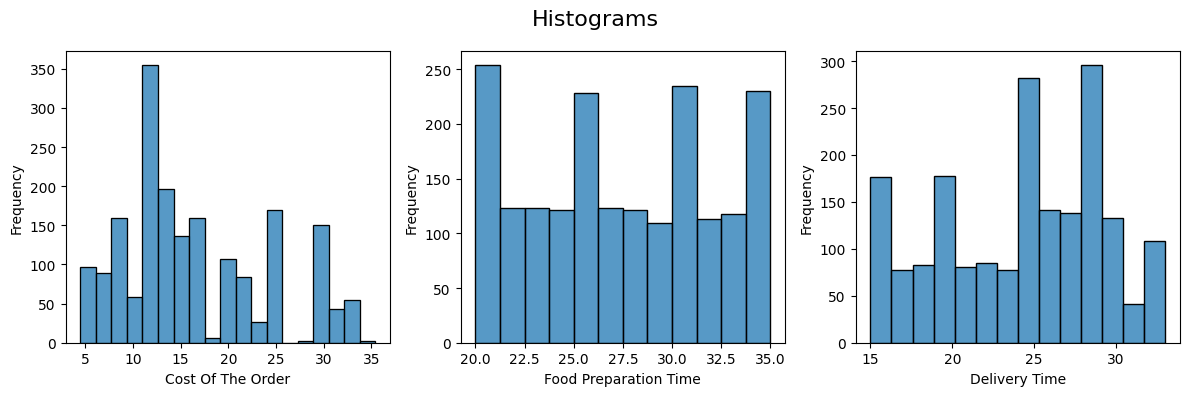

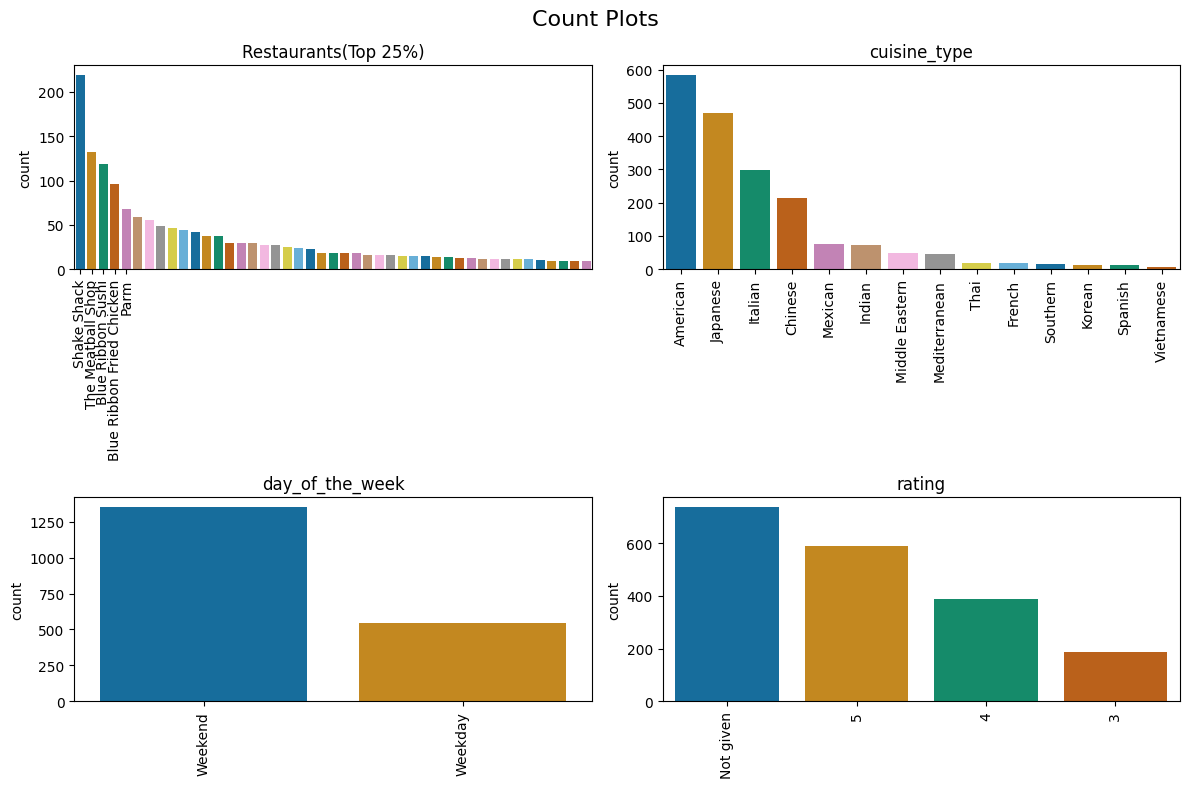

In [ ]:
# Univariate Exploration
exclude = ['order_id','customer_id']
in_col = [col for col in df.columns if col not in exclude] #excluding id columns from visuals
palette = sns.color_palette("colorblind") #setting palette for colorblindness


# Violin Plots for numerical variables
numerical_cols = df_original[in_col].select_dtypes(include=['int64', 'float64']).columns #listing numerical columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create subplots for easy viewing
fig.suptitle('Violin Plots', fontsize=16) #fixing title for all plots
sns.violinplot(df_original[in_col], ax=axes[0], palette=palette) # feeding all included variables (python filters out object). Using original data to exclude 'rating'.
sns.violinplot(df['rating'], ax=axes[1]) # rating better visualized independent of other variables.
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for the first plot
plt.tight_layout() #adjust layout
plt.show()

# Histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(12, 4))  # Create subplots
fig.suptitle('Histograms', fontsize=16)  # Set the main title for the entire figure
for i, col in enumerate(numerical_cols):  # Use enumerate to loop through numerical_cols along with an index
    sns.histplot(df_original[col], ax=axes[i], palette=palette)  # Use axes[i] to specify the subplot for each histogram

    # Capitalize each word and join with space for x-axis label
    x_label = ' '.join([word.capitalize() for word in col.split('_')])
    axes[i].set_xlabel(x_label)

    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout
plt.show()

# Countplots for Categorical Variables
categorical_cols = df_original[in_col].select_dtypes(include=['object']).columns
# Ensure that the number of columns is an integer
num_columns = len(categorical_cols) // 2  # Use integer division
num_rows = 2

fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 8))  # Create subplots

fig.suptitle('Count Plots', fontsize=16)  # Set the main title for the entire figure

for i, col in enumerate(categorical_cols):
    row_index = i // num_columns
    col_index = i % num_columns

    # Filter out the categories with counts below the threshold to improve readability
    value_counts = df_original[col].value_counts()
    threshold = value_counts.quantile(.75)  # Calculate a cutoff for restaurant category
    filtered_categories = value_counts[value_counts >= threshold].index #filter out restaurants below the top quartile
    if i == 0:  #formatting based on plot
      sns.countplot(x=df_original[col], order=filtered_categories, ax=axes[row_index, col_index], palette=palette)
      axes[row_index, col_index].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for each subplot
        # Select the first 5 x-axis labels after filtering
      labels = filtered_categories[:5]
      axes[row_index, col_index].set_xticks(range(len(labels)))  # Set ticks at even intervals
      axes[row_index, col_index].set_xticklabels(labels)  # Set the x-axis labels
      axes[row_index, col_index].set_title('Restaurants(Top 25%)')
      axes[row_index, col_index].set_xlabel('')
    else:
      sns.countplot(x=df_original[col], order=df_original[col].value_counts().index, ax=axes[row_index, col_index], palette=palette)
      axes[row_index, col_index].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for each subplot
      axes[row_index, col_index].set_title(col)
      axes[row_index, col_index].set_xlabel('')
plt.tight_layout()
plt.show()

#### Observations:
The cost of the order is right skewed with a several peaks of cost. One around 13, one around 25 and one around 30.
Food preparation is mostly uniform.
Delivery time is left skewed.
Over two-thirds of the orders come from the Weekend.
A vast majority of orders come from the top 25% of restaurants.
There is also a clear favorite in type of cuisine.

### Top 5 Frequented Restaurants

In [ ]:
#Creating a DF of the restauraunt count and percentages
res_count = pd.DataFrame({'Restaurant': df['restaurant_name'].value_counts().index,
                          'Count': df['restaurant_name'].value_counts().values,
                          'Percent': df['restaurant_name'].value_counts(normalize=True).values})

print(res_count[:5])
tot_perc=round(res_count[:5]['Percent'].sum()*100,2) #calculating total percent of orders for these 5 restaurants.
print(f'{tot_perc}% of orders come from these 5 restaurants.')

                  Restaurant  Count  Percent
0                Shake Shack    219     0.12
1          The Meatball Shop    132     0.07
2          Blue Ribbon Sushi    119     0.06
3  Blue Ribbon Fried Chicken     96     0.05
4                       Parm     68     0.04
33.4% of orders come from these 5 restaurants.


#### Observations:
A large portion (>33%) of the companies orders come from these five restaurants.

### Weekend Favorites

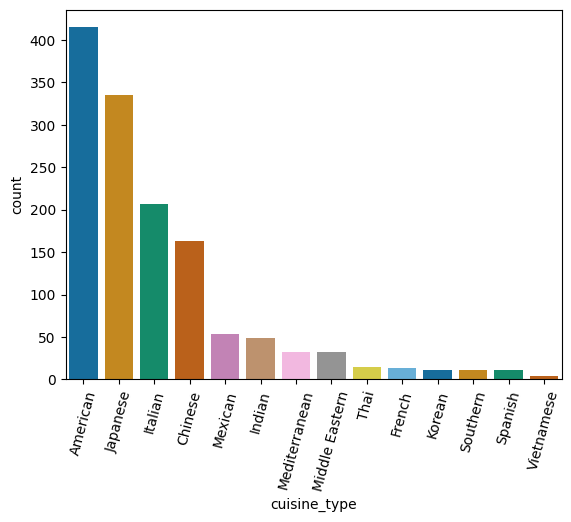

In [ ]:
#filtering df for only weekend days
df_weekend = df[df['day_of_the_week']=='Weekend']
df_weekend.head()
#plot count of restaurants in order of frequency from weekend data
sns.countplot(x=df_weekend['cuisine_type'], order=df_weekend['cuisine_type'].value_counts().index, palette=palette)
plt.xticks(rotation=75)
plt.show()

#### Observations:
American cuisine has a convincing lead in weekend orders.

### Orders Over $20 Threshold

Text(0.5, 1.0, 'Orders Over $20')

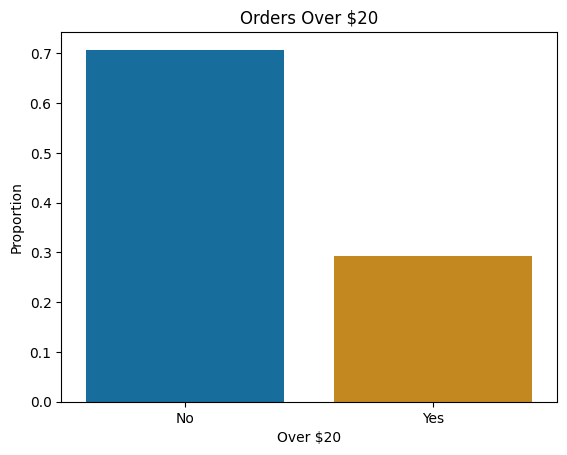

In [ ]:
#create new boolean column indicating cost over $20
df['Over $20'] = np.where(df['cost_of_the_order'] > 20, 'Yes', 'No')
df['Over $20'].value_counts(normalize=True) #percent of orders
sns.barplot(x=df['Over $20'].value_counts(normalize=True).index, y=df['Over $20'].value_counts(normalize=True).values, palette = palette)
plt.xlabel('Over $20')
plt.ylabel('Proportion')
plt.title('Orders Over $20')

#### Observations:
Only about 30% of orders are more than $20.

### Mean Delivery Time

In [ ]:
mu = np.mean(df['delivery_time'])
sd = np.std(df['delivery_time'])
print(f'The mean delivery time is {round(mu,2)} with a standard deviation of {round(sd,2)}.')

The mean delivery time is 24.16 with a standard deviation of 4.97.


#### Observations:
Mean deliver time is 24.16 minutes.

### Top 3 Customers for Voucher Reward

In [ ]:
df['customer_id'].value_counts() # count of customer id's

#Creating a DF of the customer_id and number of orders.
cust_order = pd.DataFrame({'Customer_Id': df['customer_id'].value_counts().index,
                          'Count': df['customer_id'].value_counts().values,})


print(cust_order[:4]) #print top 4

  Customer_Id  Count
0       52832     13
1       47440     10
2       83287      9
3      250494      8


#### Observations:
Customer 52832, 47440, and 83287 are the most frequent customers and should reviece the 20% discount.

### Multivariate Analysis

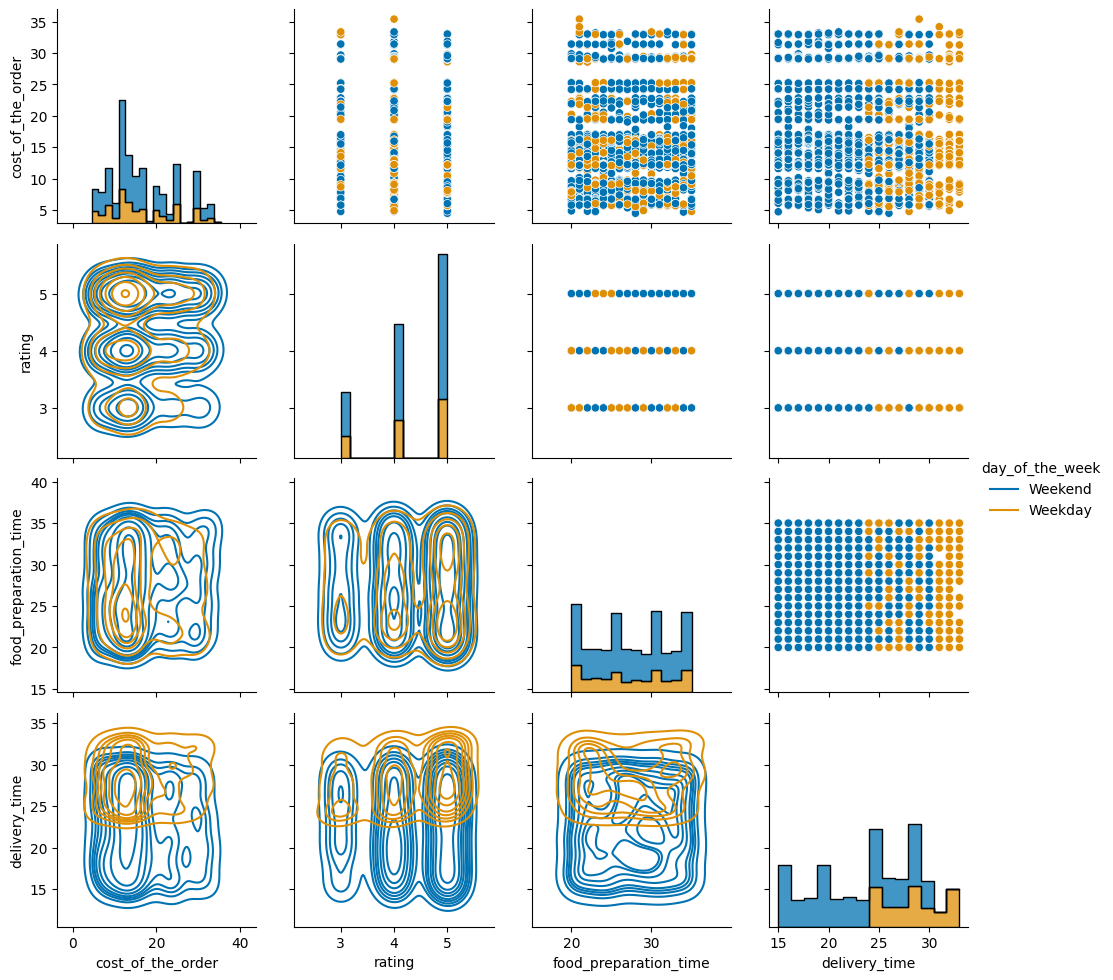

In [ ]:
g = sns.PairGrid(df[in_col], hue="day_of_the_week", palette=palette) # sets up plot layout.
g.map_diag(sns.histplot, multiple="stack", element="step") #assigns histograms to diagonal
g.map_upper(sns.scatterplot) #scatterplots on the up half.
g.map_lower(sns.kdeplot)#density plots on the lower half.
g.add_legend()

<Axes: >

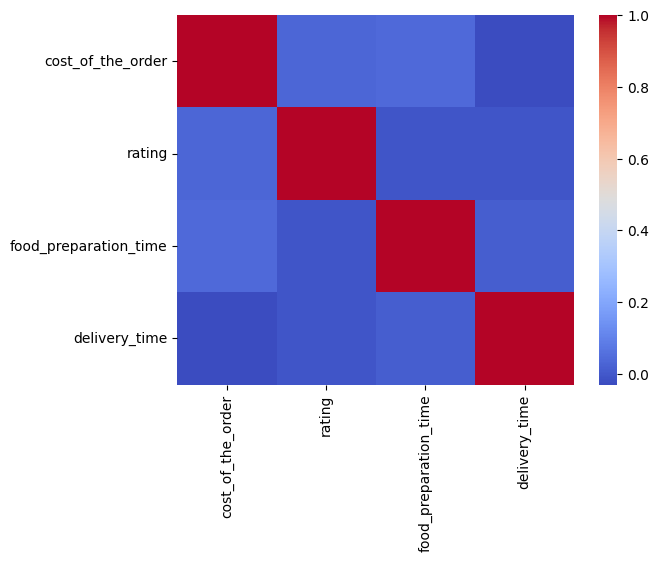

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm')

#### Observations:
There doesn't seem to be any observable relationship between the numerical variables.
There does seem to be a significant impact on delivery time and possibly rating when accounting for whether it is the weekend or not.

### Promotional Offer Companies

In [ ]:
# Companies must have greater than 50 ratings and a score over 4.
# #grouping by restaurant to count ratings and calculate mean then filtering
filtered_df = df.groupby('restaurant_name').filter(lambda x: x['rating'].count() > 50 and x['rating'].mean() >= 4)

# Retrieve the unique restaurant names from the filtered DataFrame
qualified_restaurants = filtered_df['restaurant_name'].unique()
print(qualified_restaurants)

['Blue Ribbon Fried Chicken' 'The Meatball Shop' 'Shake Shack'
 'Blue Ribbon Sushi']


#### Observations:
Blue Ribbon Fried Chicken, The Meatball Shop, Shake Shack, and Blue Ribbon Sushi all qualify to get the promotional offer.

### Calculating Revenue

In [ ]:
# 25% for orders over $20, and 15% for orders over 5.
calculate_revenue = lambda cost: 0.25 * cost if cost > 20 else (0.15 * cost if cost <= 20 and cost > 5 else 0)

# Apply the lambda function to the 'cost_of_the_order' column and assign the result to the 'revenue' column
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
total_rev=df['revenue'].sum() #find the total
avg_rev = round(total_rev/len(df['order_id']),2) #mean revenue per order.
print(f'The total revenue generated across all orders is ${total_rev}. At a mean of ${avg_rev} per order.')


The total revenue generated across all orders is $6166.303. At a mean of $3.25 per order.


#### Observations:
From this set of orders they generated 6166.303 at 3.25 per order.

### Orders over 60 minutes.

In [ ]:
# Calculate the total time required for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders where the total time exceeds 60 minutes
num_orders_exceed_60 = df[df['total_time'] > 60].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders that take more than 60 minutes
percentage_orders_exceed_60 = (num_orders_exceed_60 / total_orders) * 100

print(f"The percentage of orders taking more than 60 minutes for delivery is: {percentage_orders_exceed_60:.2f}%")

The percentage of orders taking more than 60 minutes for delivery is: 10.54%


#### Observations:
The percentage of orders taking more than 60 minutes for delivery is: 10.54%

### Delivery Times: Weekend vs. Weekday


In [ ]:
print(df.groupby('day_of_the_week')['delivery_time'].mean())
#Performing Hypothesis test to determine if delivery time is greater on weekdays.
from scipy.stats import ttest_ind #importing library for 2 sample t test

# Separate delivery times for weekdays and weekends
weekday_delivery_times = df[df['day_of_the_week'] == 'Weekday']['delivery_time']
weekend_delivery_times = df[df['day_of_the_week'] == 'Weekend']['delivery_time']

print()
# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(weekday_delivery_times, weekend_delivery_times, alternative='greater')

# Define the significance level
alpha = 0.05

# Print the results
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is sufficient evidence to conclude that the mean delivery time on weekdays is greater than weekends.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to conclude that the mean delivery time on weekdays is greater than weekends.")


day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

T-statistic: 27.56
P-value: 0.0000
Reject the null hypothesis: There is sufficient evidence to conclude that the mean delivery time on weekdays is greater than weekends.


#### Observations:
There appears to be a significant difference in delivery time on the weekend vs. weekday. Completing a hypothesis test to determine if weekday delivery time is greater than weekend delivery time, shows that there is sufficent evidence that delivery time is longer during the week.

### Conclusion and Recommendations

### Conclusions:
*  Based on my analysis, I believe further investigation into ratings should be conducted to ensure quality of data. Not having any ratings below 3 seems like an unlikely result.
Over 33% of the orders come from the their top 5 restaurants and a overwhelming majority from American, Japanese, Italian, and Chinese cuisines.
The only variables that show any correlation is delivery time based on day of the week and rating based on day of the week with more 5 star rating on the weekend. It appears that rating and delivery time is related.

### Recommendations:

*  Campaign to increase driver availability during the week to drive down delivery time.
*  Position drivers within 20-25 min of top 25% of restaurants to ensure food is in route immediately after prep.
* Analyze missing ratings to determine if they relate to customer satisfaction.
* Continue to promote top restaurants and favorite cuisines.

---